In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("planets")

In [39]:
# Exploring the data set.
print(df.head())
print(df.info())
print(df.describe())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 784
Data columns (total 6 columns):
method            498 non-null object
number            498 non-null int64
orbital_period    498 non-null float64
mass              498 non-null float64
distance          498 non-null float64
year              498 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.2+ KB
None
          number  orbital_period        mass    distance         year
count  498.00000      498.000000  498.000000  498.000000   498.000000
mean     1.73494      835.778671    2.509320   52.068213  2007.

In [7]:
# Remove rows with missing data. Acceptable for data visualisation practice purposes.
df = df.dropna()
print(df.info())
print(df.describe())

                  number  orbital_period      mass  distance      year
number          1.000000       -0.059435 -0.249915 -0.288808  0.110399
orbital_period -0.059435        1.000000  0.184906 -0.035069  0.070186
mass           -0.249915        0.184906  1.000000  0.274082 -0.137946
distance       -0.288808       -0.035069  0.274082  1.000000  0.193087
year            0.110399        0.070186 -0.137946  0.193087  1.000000


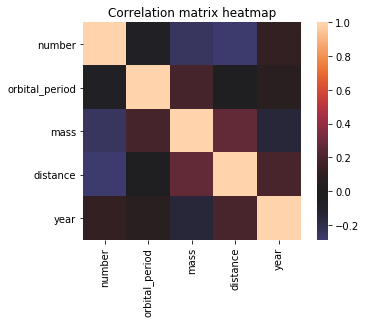

In [9]:
# Correlations between numeric variables.
corr_mat = df.corr()
print(corr_mat)
sns.heatmap(corr_mat, square = True, center = 0)
plt.title('Correlation matrix heatmap')
plt.show()

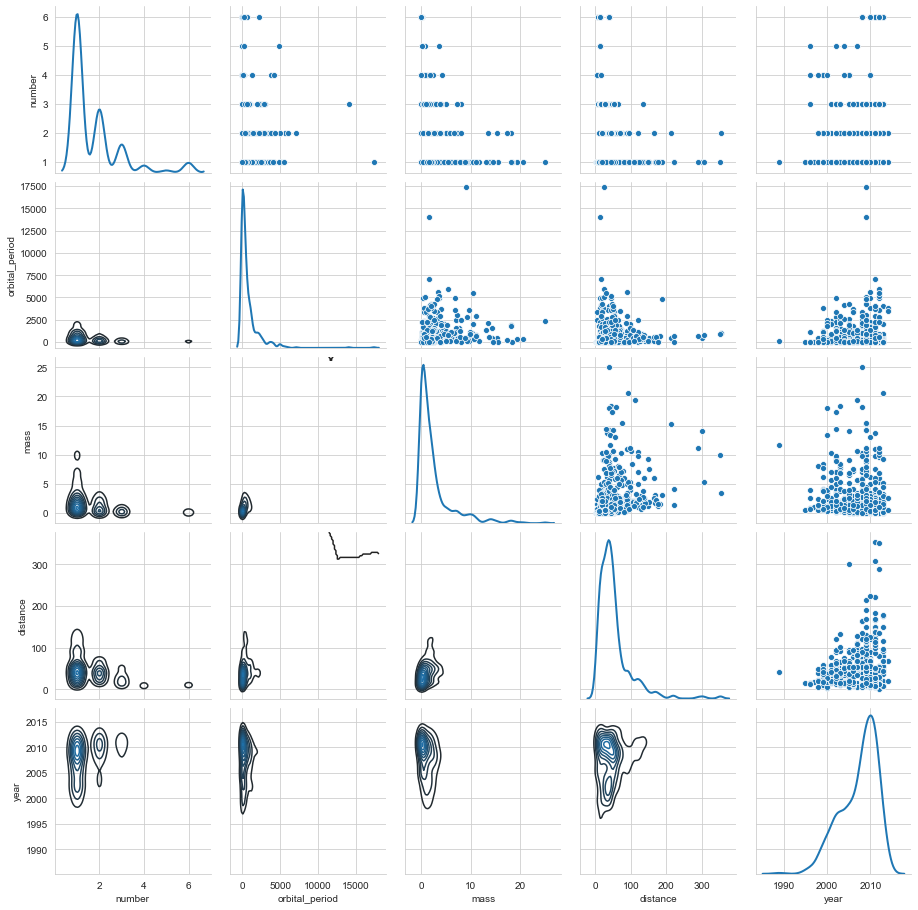

In [12]:
# Scatter plots and histograms between combinations of numeric variables.
sns.set_style('whitegrid')
g = sns.PairGrid(df, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)
plt.show()

In [27]:
# Melt into long format.
df_melted = df.melt(id_vars = 'method')
print(df_melted.head())

            method variable  value
0  Radial Velocity   number    1.0
1  Radial Velocity   number    1.0
2  Radial Velocity   number    1.0
3  Radial Velocity   number    1.0
4  Radial Velocity   number    1.0


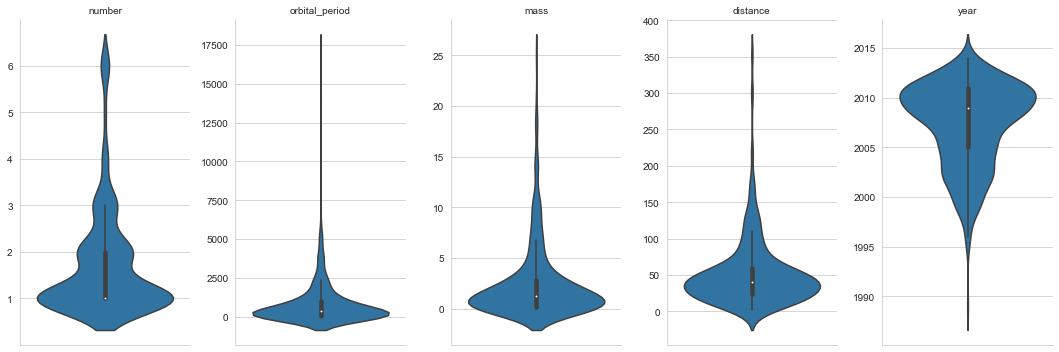

In [34]:
g = sns.catplot(y="value",
            col="variable", aspect=.6,
            kind="violin", data=df_melted, sharey = False)
(g.set_axis_labels('', '')
.set_titles("{col_name}"))
plt.show()

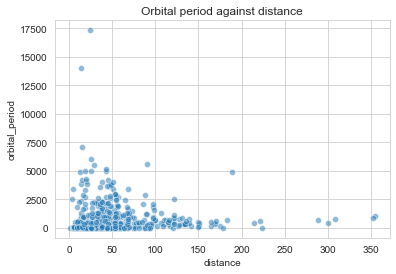

In [38]:
sns.scatterplot(x = 'distance', y = 'orbital_period', data = df, alpha = 0.5)
plt.title('Orbital period against distance')
plt.show()